# Text Mining Assignment 1

#### Packages and Data Reading

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud
import spacy

tbbt = pd.read_csv("C:/Users/jorge/Scripts TBBT.csv")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jorge\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


#### Data Preparation

In [89]:
leonard = tbbt[tbbt["person_scene"] == "Leonard"]

In [90]:
nlp = spacy.load("en_core_web_sm")

In [91]:
#Process Text

#Functions for text processing (Removing stopwords and applying PorterStemmer)
def remove_stopwords(words):
    # Get the list of English stopwords
    stop_words = set(stopwords.words('english'))    
    # Filter out the stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return filtered_words

def stemmer(words):
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]
    return stemmed_words

#Tokenize sentences
leonard["sentences"] = leonard["dialogue"].apply(lambda x : sent_tokenize(x))

#Delete punctuation
leonard["dialogue"] = leonard["dialogue"].apply(lambda x : re.sub(r"[^\w\s]", "", x))

#Tokenize Words
leonard["words"] = leonard["dialogue"].apply(lambda x : word_tokenize(x))

#Removing Stopwords
leonard["words"] = leonard["words"].apply(lambda x : remove_stopwords(x))

# POS Tagging and NER

def pos_tagging(words):
    # Join the words list back into a single string
    text = " ".join(words)
    
    # Process the text with spaCy
    doc = nlp(text)
    
    # Extract POS tags
    pos_tags = [(token.text, token.pos_) for token in doc]    
    return pos_tags

def ner(words):
    text = " ".join(words)
    doc = nlp(text)
    entities = [(entity.text, entity.label_) for entity in doc.ents]
    return entities

leonard["POS"] = leonard["words"].apply(lambda x : pos_tagging(x)) 
leonard["NER"] = leonard["words"].apply(lambda x : ner(x)) 

#lowercase
def lowercasing(words):
    lowercased = [word.lower() for word in words]
    return lowercased
leonard["words"] = leonard["words"].apply(lambda x : lowercasing(x))

#Applying PorterStemmer
leonard["words"] = leonard["words"].apply(lambda x : stemmer(x))

C:\Users\jorge\AppData\Local\Temp\ipykernel_33676\2330282147.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leonard["sentences"] = leonard["dialogue"].apply(lambda x : sent_tokenize(x))
C:\Users\jorge\AppData\Local\Temp\ipykernel_33676\2330282147.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leonard["dialogue"] = leonard["dialogue"].apply(lambda x : re.sub(r"[^\w\s]", "", x))
C:\Users\jorge\AppData\Local\Temp\ipykernel_33676\2330282147.py:23: SettingWithCopyWarning: 
A value is trying to be set

### Question 1

##### Sentences and words per episode

In [92]:
#Making columns for number of sentences and words
leonard['nr_sentences'] = leonard['sentences'].apply(lambda x : len(x))
leonard['nr_words'] = leonard['words'].apply(lambda x : len(x))

#Group by episode, sum and make mean
print(leonard.groupby('episode_name')['nr_sentences'].sum().mean())
print(leonard.groupby('episode_name')['nr_words'].sum().mean())

61.926406926406926
209.39826839826839


C:\Users\jorge\AppData\Local\Temp\ipykernel_33676\4024592200.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leonard['nr_sentences'] = leonard['sentences'].apply(lambda x : len(x))
C:\Users\jorge\AppData\Local\Temp\ipykernel_33676\4024592200.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leonard['nr_words'] = leonard['words'].apply(lambda x : len(x))


##### Variation across seasons

In [93]:
#Group by season, make mean of sums of sentences
leonard['Season'] = leonard['episode_name'].apply(lambda x : x[:9])
print(leonard.groupby(['Season', 'episode_name'])['nr_sentences'].sum().groupby('Season').mean())

Season
Series 01    91.764706
Series 02    78.695652
Series 03    75.739130
Series 04    66.541667
Series 05    61.291667
Series 06    53.416667
Series 07    54.208333
Series 08    54.208333
Series 09    49.875000
Series 10    43.500000
Name: nr_sentences, dtype: float64


C:\Users\jorge\AppData\Local\Temp\ipykernel_33676\2356514820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leonard['Season'] = leonard['episode_name'].apply(lambda x : x[:9])


In [94]:
#Group by season, make mean of sums of words
print(leonard.groupby(['Season', 'episode_name'])['nr_words'].sum().groupby('Season').mean())

Season
Series 01    348.058824
Series 02    267.000000
Series 03    242.739130
Series 04    205.000000
Series 05    199.875000
Series 06    179.875000
Series 07    182.250000
Series 08    188.625000
Series 09    167.500000
Series 10    157.291667
Name: nr_words, dtype: float64


#### Question 2

##### Data Processing

In [97]:
#Take nouns and person names from POS and NER
def select_nouns(pos):
    nouns = []
    for tuplee in pos:
        if tuplee[1] == "NOUN" and tuplee[0].lower() != "penny":
            nouns.append(tuplee[0])
    return nouns

def select_personnames(ner):
    person_names = []
    for tuplee in ner:
        if tuplee[1] == "PERSON":
            person_names.append(tuplee[0])
    return person_names

def add_penny(pos):
    times_penny = []
    for tuplee in pos:
        if tuplee[1] == "NOUN" and tuplee[0].lower() == "penny":
            times_penny.append("penny")
    return times_penny

            
leonard['nouns'] = leonard["POS"].apply(lambda x : select_nouns(x))
leonard['personnames'] = leonard["NER"].apply(lambda x : select_personnames(x))
leonard['penny'] = leonard["POS"].apply(lambda x : add_penny(x))
leonard['personnames'] = leonard.apply(lambda row : row['personnames'] + row['penny'], axis = 1)

#Apply lowercasing again for both nouns and person names
leonard["nouns"] = leonard["nouns"].apply(lambda x : lowercasing(x))
leonard["personnames"] = leonard["personnames"].apply(lambda x : lowercasing(x))

#Collect a list with all nouns and a list with all person names
def collect(colname):
    list_all = []
    for listt in leonard[colname]:
        list_all.extend(listt)
    return list_all

C:\Users\jorge\AppData\Local\Temp\ipykernel_33676\2746861802.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leonard['nouns'] = leonard["POS"].apply(lambda x : select_nouns(x))
C:\Users\jorge\AppData\Local\Temp\ipykernel_33676\2746861802.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leonard['personnames'] = leonard["NER"].apply(lambda x : select_personnames(x))
C:\Users\jorge\AppData\Local\Temp\ipykernel_33676\2746861802.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

##### How many nouns and person names are mentioned?

In [99]:
allnouns = collect("nouns")
print("Number of nouns mentioned:")
print(len(allnouns))
print("Number of unique nouns mentioned:")
print(len(set(allnouns)))

allnames = collect("personnames")
print("Number of person names mentioned:")
print(len(allnames))
print("Number of unique person names mentioned:")
print(len(set(allnames)))


Number of nouns mentioned:
12298
Number of unique nouns mentioned:
3472
Number of person names mentioned:
1400
Number of unique person names mentioned:
560


##### Wordclouds and Barcharts for nouns and person names

In [100]:
#Count occurrences of each word and name
nouncounts = Counter(allnouns)
namecounts = Counter(allnames)

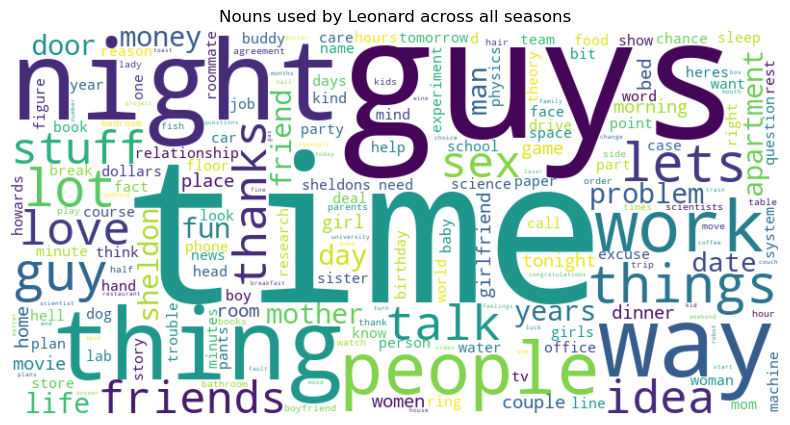

In [101]:
# Generate word cloud for nouns
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(nouncounts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Nouns used by Leonard across all seasons")
plt.axis("off")
plt.show()

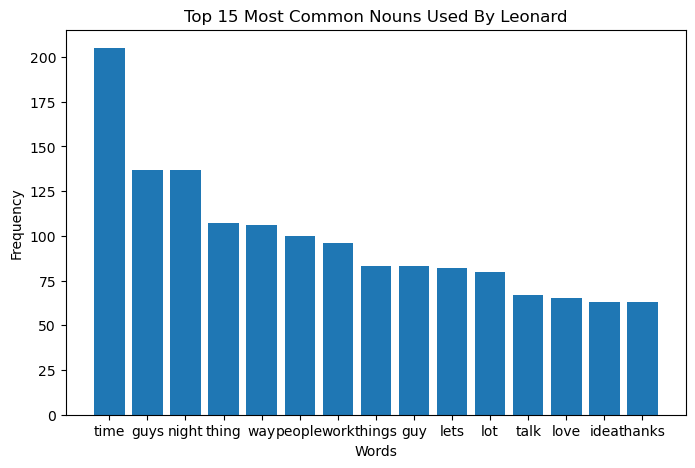

In [102]:
#Generate bar chart for nouns
top_15_nouns = nouncounts.most_common(15)

# Separate the data into labels and values for plotting
labels, values = zip(*top_15_nouns)

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, values)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Most Common Nouns Used By Leonard')
plt.show()

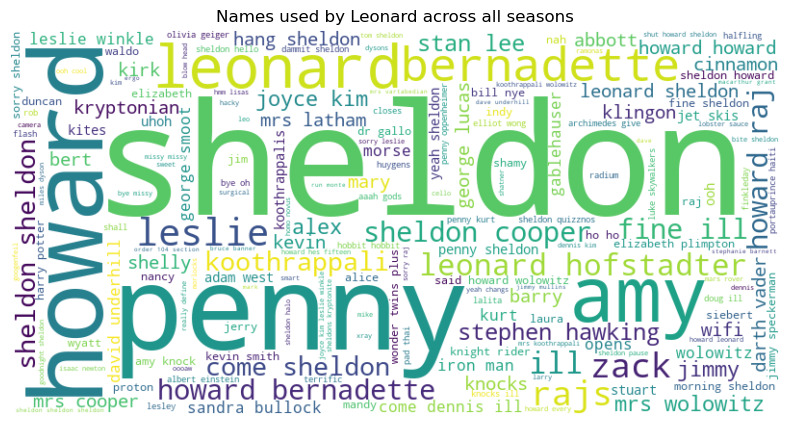

In [103]:
# Generate word cloud for names
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(namecounts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Names used by Leonard across all seasons")
plt.axis("off")
plt.show()

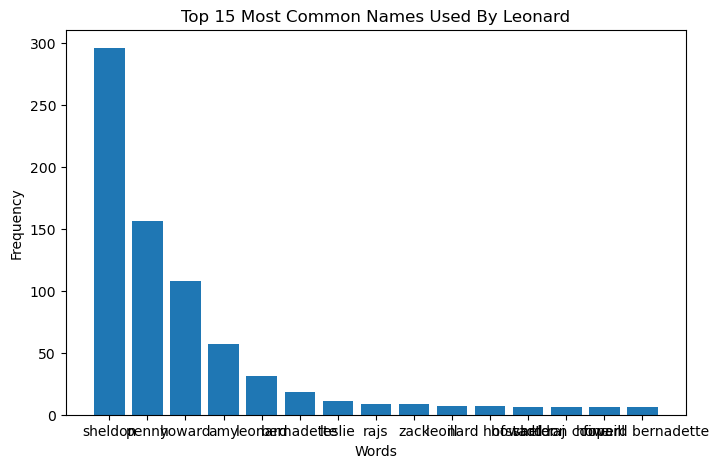

In [104]:
#Generate bar chart for names
top_15_names = namecounts.most_common(15)

# Separate the data into labels and values for plotting
labels, values = zip(*top_15_names)

# Plot the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, values)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 15 Most Common Names Used By Leonard')
plt.show()